In [1]:
'''I deleted the data to generate these since I don't want to save
such large files. The procedure was:
1) Go to https://apps.nationalmap.gov/downloader/#/
2) Download a .TIF file for region of interest
3) Open it in qgis, snip to mountain (raster->extraction->clip by extent)
then convert it to xyz (raster->conversion->translate, switch from
save temporary file to a real file name)
4) Run np.genfromtxt on that file, save the XYZ as a .npy array, use that
for plotting. They're huge files, so for early iterations I pulled 
random samples from them'''


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from matplotlib import cm
from tqdm import tqdm

[None]

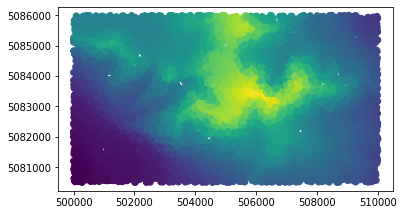

In [2]:
# Load KATAHDIN data

# Z = np.genfromtxt("C:\\Users\\bccas\\Downloads\\zzz.xyz")
# np.save("C:\\Users\\bccas\\Desktop\\katahdin.npy", Z)
# Z = np.load("C:\\Users\\bccas\\Google Drive\\Columbia University\\Random\\Topo Graphics Project\\katahdin_full.npy")
# rands = np.random.randint(0, len(Z), 10000)
# z = np.copy(Z[rands])
# plt.scatter(z[:,0], z[:,1], c=z[:,2])

# crop = np.copy(Z[np.where(Z[:,1] < 5086000)])
# crop = np.copy(crop[np.where(crop[:,1] > 5080500)])
# rands = np.random.randint(0, len(crop), 1000000)
# c = np.copy(crop[rands])
# np.save("C:\\Users\\bccas\\Google Drive\\Columbia University\\Random\\Topo Graphics Project\\katahdin_cropped_sampled.npy", c)
katahdin = np.load("C:\\Users\\bccas\\Google Drive\\Columbia University\\Random\\Topo Graphics Project\\katahdin.npy")
r = np.random.randint(0, len(katahdin), 10000)
fig, ax = plt.subplots()
ax.scatter(katahdin[r,0], katahdin[r,1], c=katahdin[r,2])
ax.set(aspect='equal')

[None]

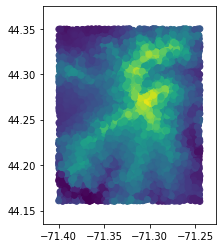

In [3]:
# Load the WASHINTON data
# Z = np.genfromtxt("C:\\Users\\bccas\\Google Drive\\Columbia University\\Random\\Topo Graphics Project\\washington.xyz")
# np.save("C:\\Users\\bccas\\Desktop\\washington.npy", Z)
washington = np.load("C:\\Users\\bccas\\Google Drive\\Columbia University\\Random\\Topo Graphics Project\\washington.npy")
r = np.random.randint(0, len(washington), 10000)
fig, ax = plt.subplots()
ax.scatter(washington[r,0], washington[r,1], c=washington[r,2])
ax.set(aspect='equal')

In [18]:
# Generating a bunch of different line width, contour density, and background
# color versions
widths = [0.1, 0.2, 0.3, 0.5]
levels = [50, 75]
colors = ['#303030', '#4f4f4f']

for w in tqdm(widths):
    for l in levels:
        for c in colors:
            name = 'katahdin_' + str(w) + '_' + str(l) + '_' + str(c) + '.svg'

            r = np.random.randint(0, len(katahdin), 500000)
            fc = c
            fig, axs = plt.subplots(figsize=(18,9), facecolor=fc, nrows=1, ncols=1)
            axs.tricontour(katahdin[:,0], katahdin[:,1], katahdin[:,2], l, colors='#ffffff', linewidths=w)
            axs.set(aspect='equal', facecolor=fc, xticks=[], yticks=[])
            axs.spines['bottom'].set_color(fc)
            axs.spines['top'].set_color(fc) 
            axs.spines['right'].set_color(fc)
            axs.spines['left'].set_color(fc)
            pos1 = axs.get_position() # get the original position 
            pos2 = [pos1.x0+0.14, pos1.y0,
                             pos1.width,
                             pos1.height]
            axs.set_position(pos2)
            plt.tight_layout()
            fig.savefig(name, pad_inches=0, facecolor=fc)
            plt.close()

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [03:29<00:00, 52.48s/it]


In [6]:
r = np.random.randint(0, len(katahdin), 500000)
fc = '#4f4f4f'
fig, axs = plt.subplots(figsize=(18,9), facecolor=fc, nrows=1, ncols=1)
axs.tricontour(katahdin[:,0], katahdin[:,1], katahdin[:,2], 75, colors='#ffffff', linewidths=0.5)
axs.set(aspect='equal', facecolor=fc, xticks=[], yticks=[])
axs.spines['bottom'].set_color(fc)
axs.spines['top'].set_color(fc) 
axs.spines['right'].set_color(fc)
axs.spines['left'].set_color(fc)
pos1 = axs.get_position() # get the original position 
pos2 = [pos1.x0+0.14, pos1.y0,
                 pos1.width,
                 pos1.height]
axs.set_position(pos2)
plt.tight_layout()
fig.savefig('katahdin_final.svg', pad_inches=0, facecolor=fc, dpi=600)
plt.close()

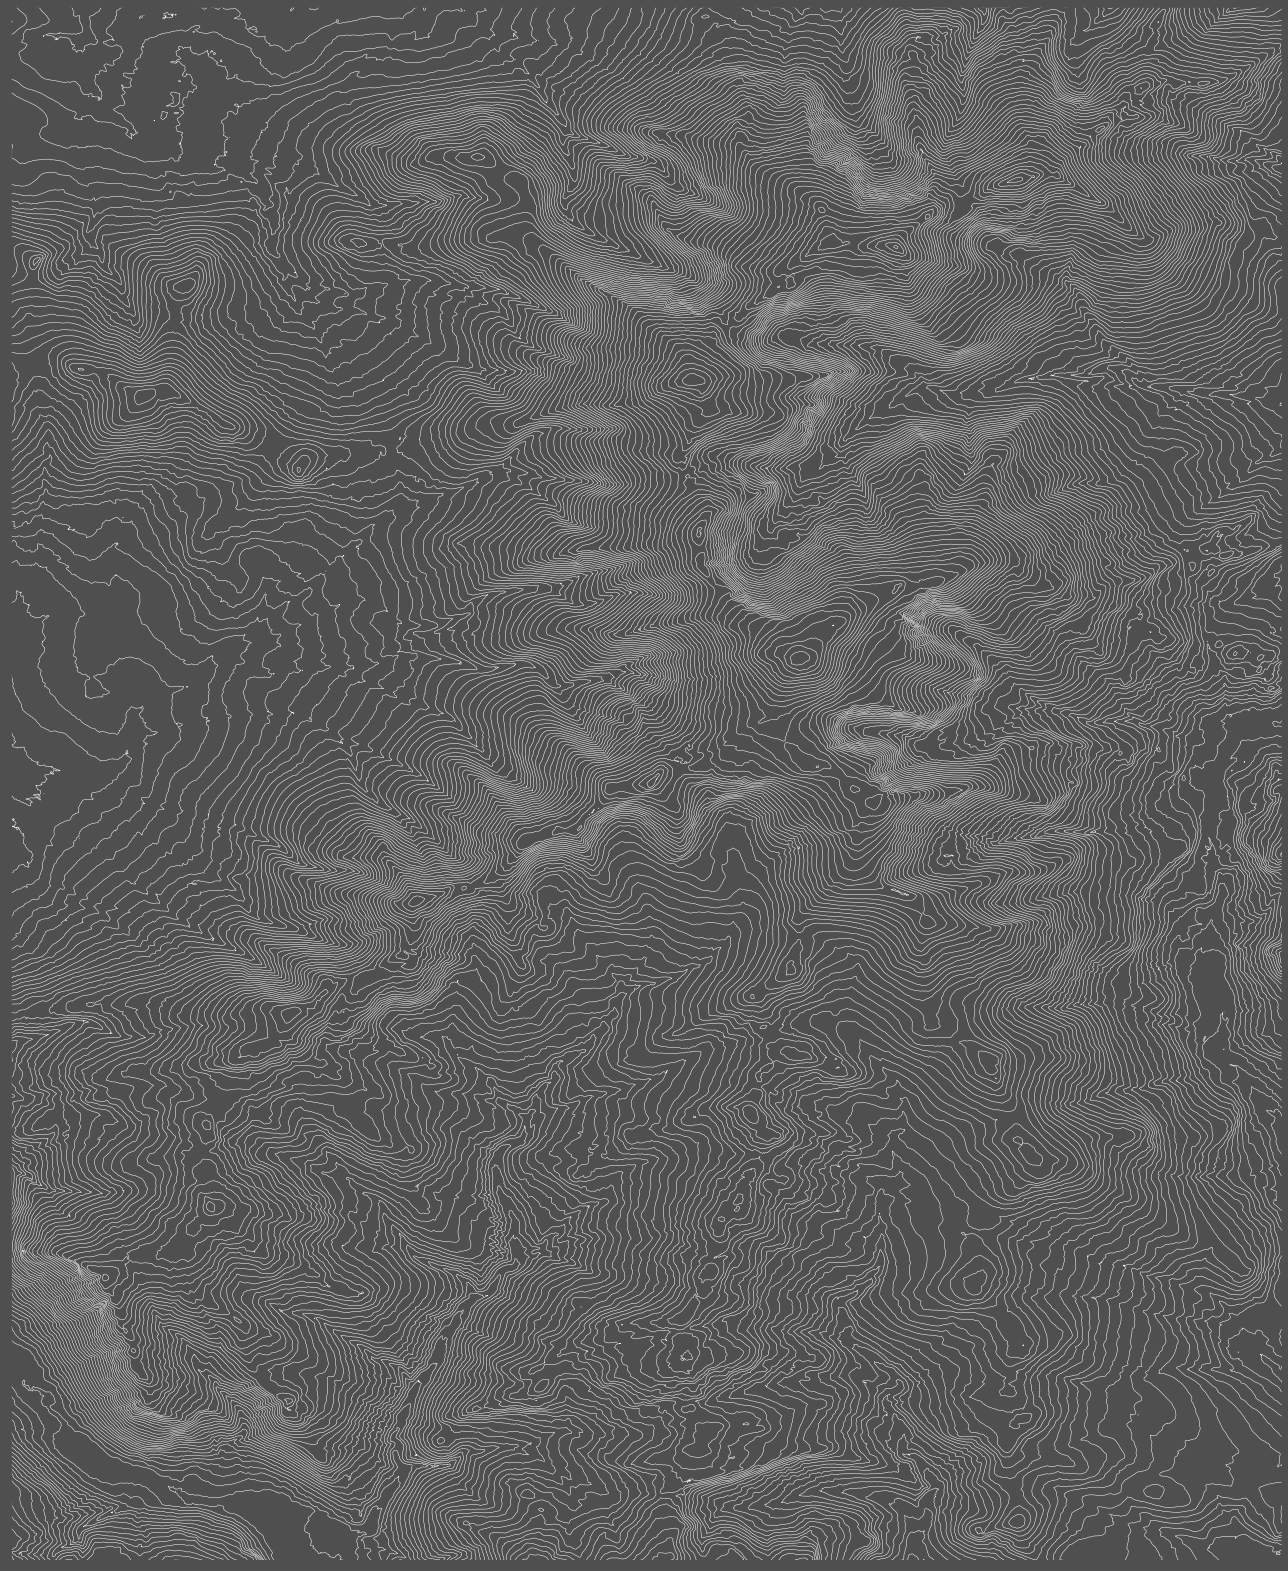

In [9]:
# The final Mt. Washington figure
r = np.random.randint(0, len(washington), 1000000)
fc = '#4f4f4f'
fig, axs = plt.subplots(figsize=(18,24), facecolor='#4f4f4f', nrows=1, ncols=1)
axs.tricontour(washington[r,0], washington[r,1], washington[r,2], 80, colors='#ffffff', linewidths=0.5)
pos1 = axs.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0-0.1,
                 pos1.width,
                 pos1.height]
axs.set(aspect='equal', facecolor=fc, xticks=[], yticks=[])
# axs.axis('off')
axs.set_position(pos2)
axs.spines['bottom'].set_color(fc)
axs.spines['top'].set_color(fc) 
axs.spines['right'].set_color(fc)
axs.spines['left'].set_color(fc)
plt.tight_layout()
fig.savefig('washington_final.svg', pad_inches=0, facecolor='#4f4f4f', dpi=600)

## Plotting fun

<IPython.core.display.Javascript object>


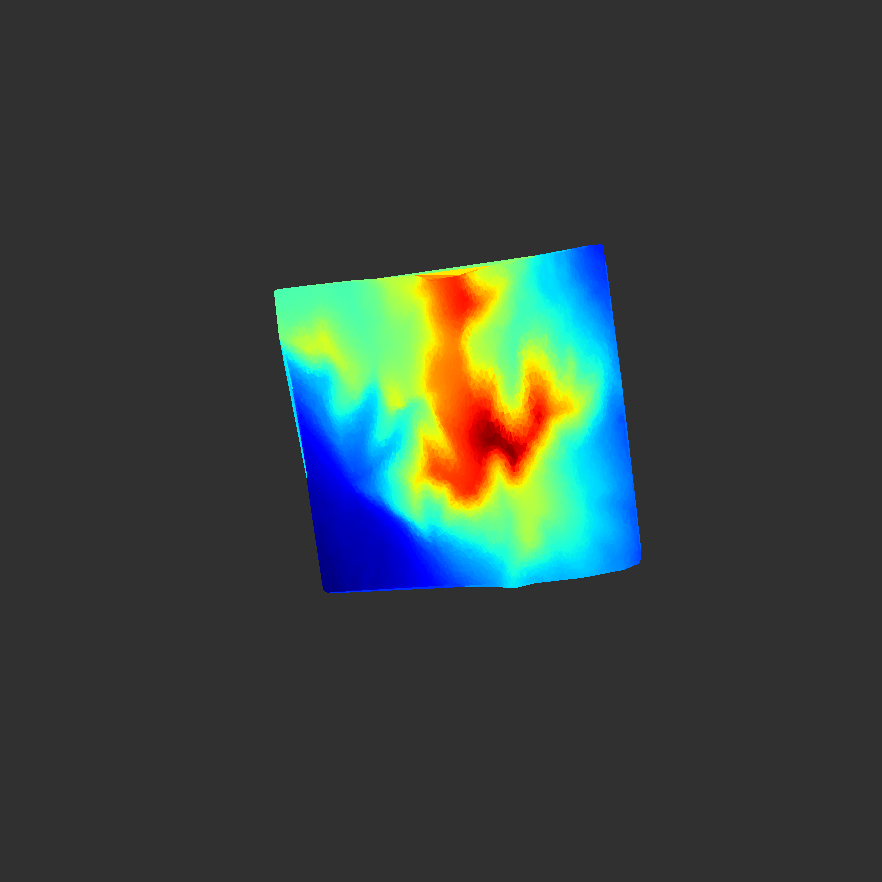

In [60]:
r = np.random.randint(0, len(katahdin), 10000)
fc = '#303030'
fig = plt.figure(figsize=(5,5), facecolor=fc)
ax = plt.axes(projection='3d', facecolor=fc)
ax.grid(False)
ax.plot_trisurf(katahdin[r,0], katahdin[r,1], katahdin[r,2],cmap=cm.jet, alpha=1, edgecolor='none', linewidth=0, antialiased=False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor(fc)
ax.yaxis.pane.set_edgecolor(fc)
ax.zaxis.pane.set_edgecolor(fc)
ax.set(xticks=[], yticks=[], zticks=[])
ax.set_axis_off()

<IPython.core.display.Javascript object>


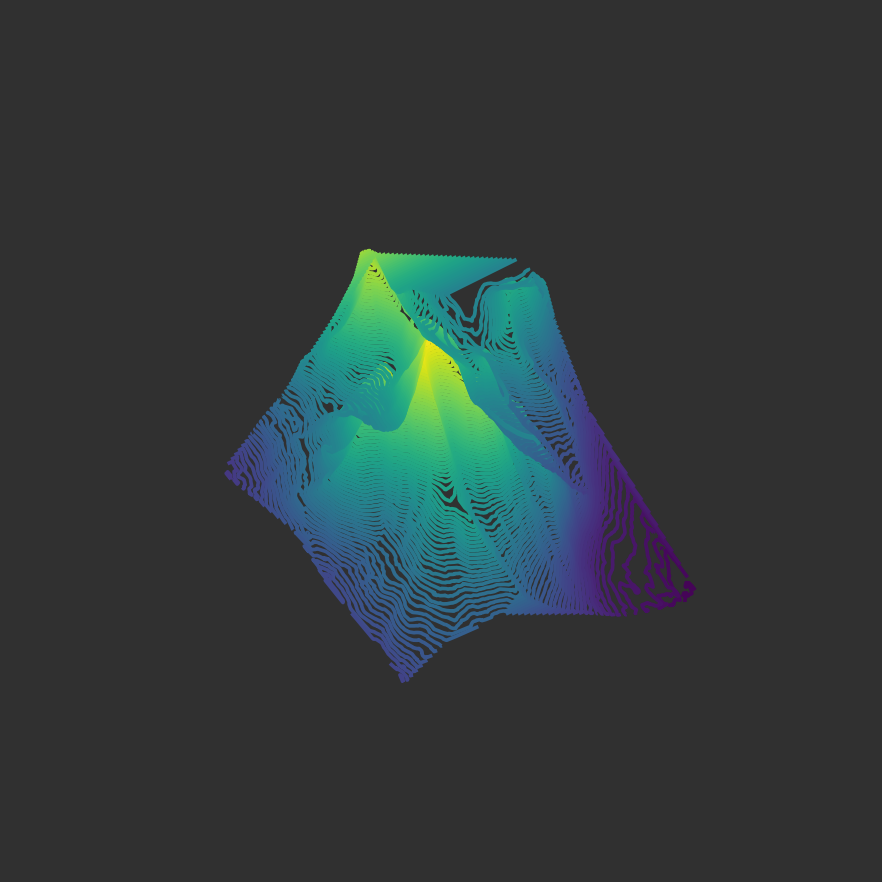

In [54]:
r = np.random.randint(0, len(katahdin), 10000)
fc = '#303030'
fig = plt.figure(figsize=(5,5), facecolor=fc)
ax = plt.axes(projection='3d')
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor(fc)
ax.yaxis.pane.set_edgecolor(fc)
ax.zaxis.pane.set_edgecolor(fc)
ax.set(xticks=[], yticks=[], zticks=[], facecolor=fc)
ax.set_axis_off()
ax.tricontour(katahdin[r,0], katahdin[r,1], katahdin[r,2], 100)

In [ ]:
rands = np.random.randint(0, len(crop), 100000)
c = np.copy(crop[rands])
fig, ax = plt.subplots(figsize=(8,4), facecolor='grey')
ax.tricontour(c[:,0], c[:,1], c[:,2], 50, colors='white', linewidths=0.2)
ax.set(aspect='equal', facecolor='grey', xticks=[], yticks=[])
plt.tight_layout()

[None]

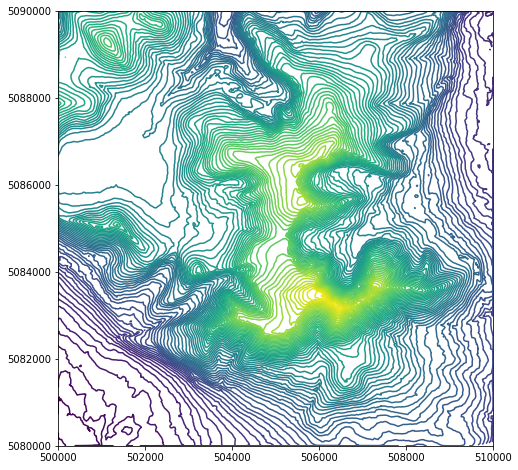

In [17]:
q = np.copy(Z[np.random.randint(0, len(Z), 50000)])
fig, ax = plt.subplots(figsize=(8,8))
ax.tricontour(q[:,0], q[:,1], q[:,2], 75)
ax.set(aspect='equal')

In [22]:
%matplotlib notebook

<IPython.core.display.Javascript object>


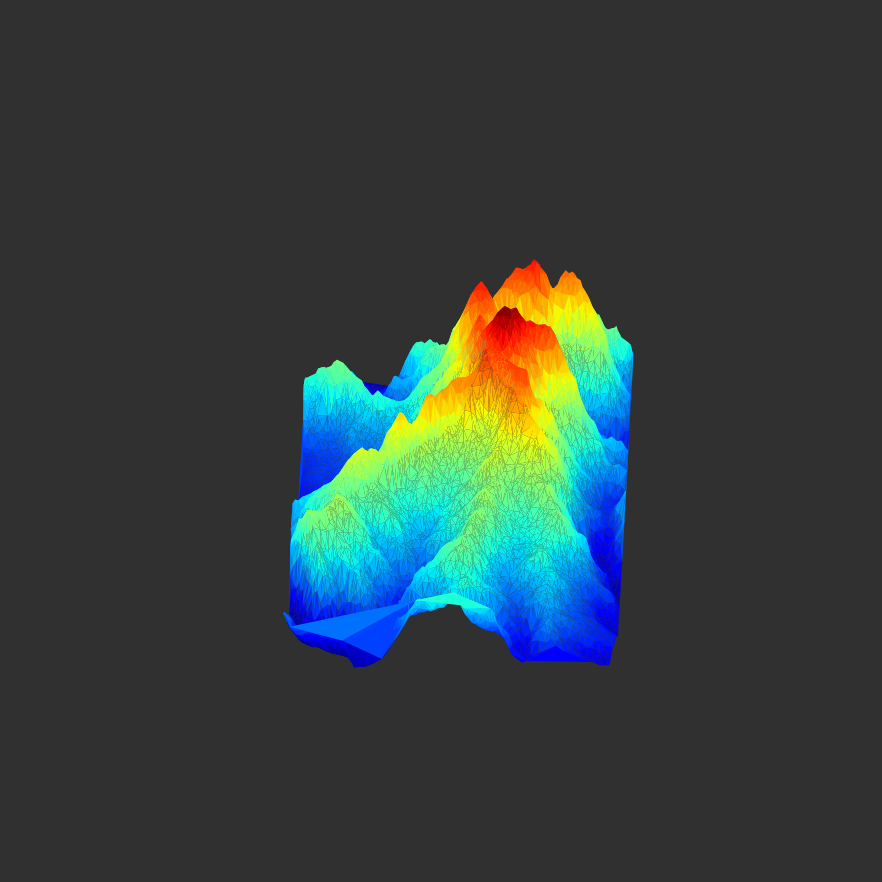

In [41]:
r = np.random.randint(0, len(washington), 10000)
fc = '#303030'
fig = plt.figure(figsize=(5,5), facecolor=fc)
ax = plt.axes(projection='3d', facecolor=fc)
ax.grid(False)
ax.plot_trisurf(washington[r,0], washington[r,1], washington[r,2],cmap=cm.jet, alpha=1)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor(fc)
ax.yaxis.pane.set_edgecolor(fc)
ax.zaxis.pane.set_edgecolor(fc)
ax.set(xticks=[], yticks=[], zticks=[])
ax.set_axis_off()

<IPython.core.display.Javascript object>


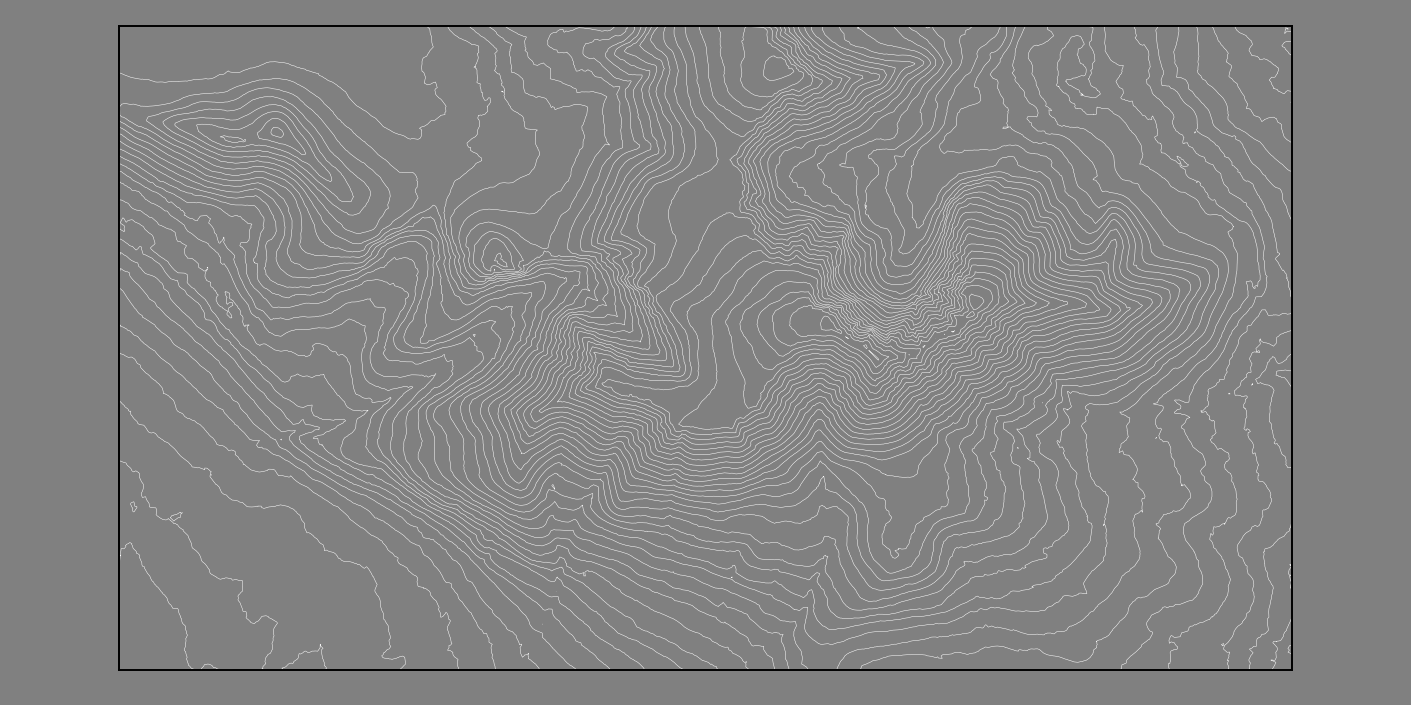

In [69]:
rands = np.random.randint(0, len(crop), 100000)
c = np.copy(crop[rands])
fig, ax = plt.subplots(figsize=(8,4), facecolor='grey')
ax.tricontour(c[:,0], c[:,1], c[:,2], 50, colors='white', linewidths=0.2)
ax.set(aspect='equal', facecolor='grey', xticks=[], yticks=[])
plt.tight_layout()

<IPython.core.display.Javascript object>


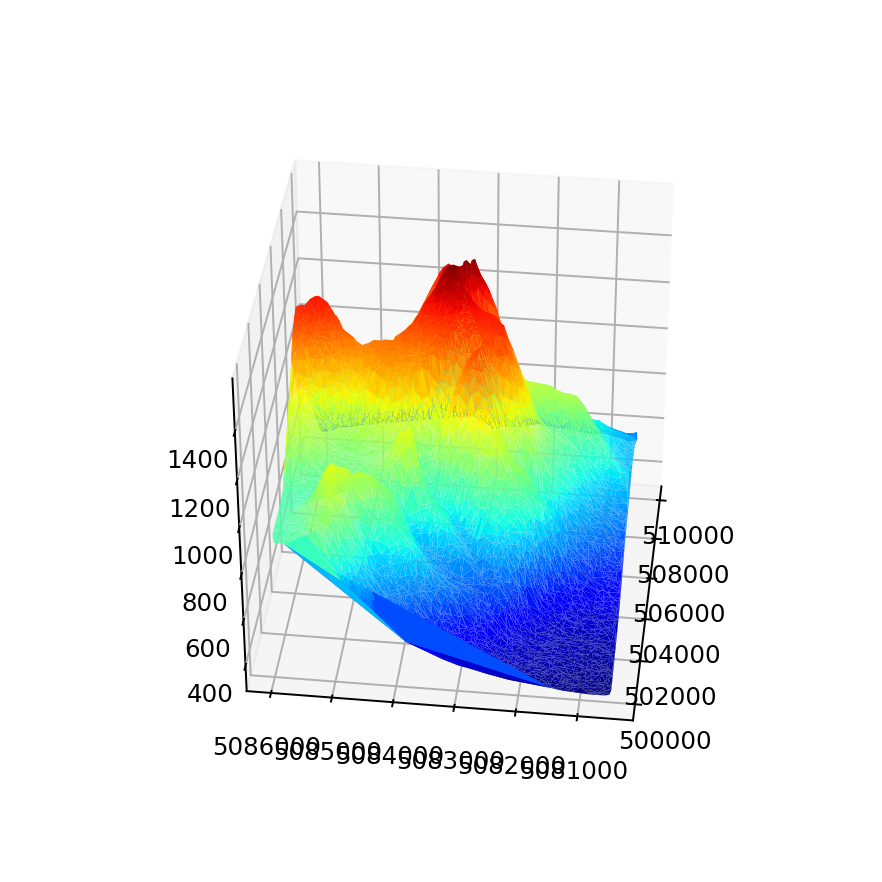

<IPython.core.display.Javascript object>


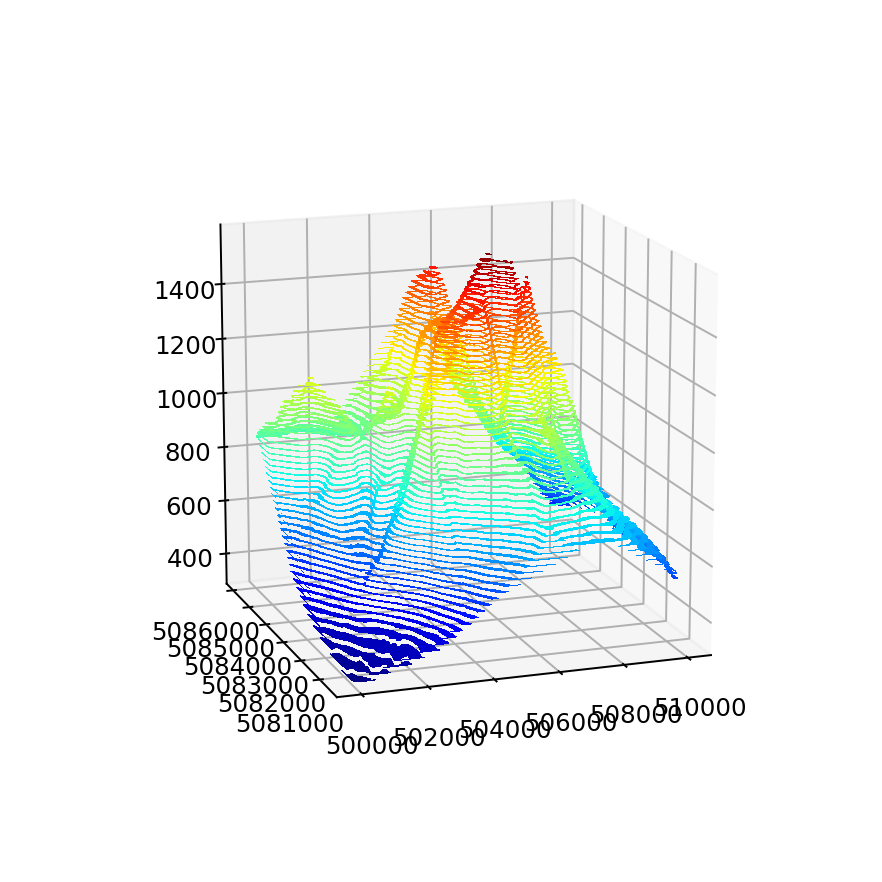

In [54]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')
ax.plot_trisurf(c[:,0], c[:,1], c[:,2],cmap=cm.jet)

fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')
ax.tricontourf(c[:,0], c[:,1], c[:,2], 75, cmap=cm.jet)